# INSTRUCTIONS
- Please answer the following questions with the code language provided
- Feel free to add more cells when necessary for each question than just the one provided
- For python code, the code cells should be executed and the final cell output should display the answer to the question
- For SQL, the answer cells are set to "Markdown" so please execuse as a markdown to ensure the code stays saved

# Import headers and the 3 data files

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# What is the total revenue generated in the entire data set?

python code

In [2]:
import pandas as pd 
customers = pd.read_csv("customers.csv") 
orders = pd.read_csv("orders.csv") 
prices=pd.read_csv("prices.csv") 

In [210]:
#orders.head()
#customers.head()
prices.head()

,product,price
0,x1,4.58
1,x2,44.22
2,x3,79.89
3,x4,12.19
4,x5,56.09


In [11]:
ordersANDprices = pd.merge(orders, prices, on="product")
ordersANDprices.head()

,order_number,customer_name,product,quantity,date,price
0,1,carreca01,y3,1,2017-12-09,81.46
1,2,handdo01,y3,1,2017-11-27,81.46
2,18,decindo01,y3,2,2017-12-22,81.46
3,20,taveral01,y3,4,2017-10-17,81.46
4,25,wallide01,y3,3,2017-10-30,81.46


In [15]:
ordersANDprices['total_cost']=ordersANDprices['price']*ordersANDprices['quantity']
ordersANDprices.head()

,order_number,customer_name,product,quantity,date,price,total_cost
0,1,carreca01,y3,1,2017-12-09,81.46,81.46
1,2,handdo01,y3,1,2017-11-27,81.46,81.46
2,18,decindo01,y3,2,2017-12-22,81.46,162.92
3,20,taveral01,y3,4,2017-10-17,81.46,325.84
4,25,wallide01,y3,3,2017-10-30,81.46,244.38


In [16]:
print('The total revenue for the orders in Orders.csv is:')
print(ordersANDprices['total_cost'].sum())

The total revenue for the orders in Orders.csv is:
85221.28


SQL code

~~~~sql
CREATE TABLE customers (
    customer_name char,
    zip_code int,
);

CREATE TABLE orders (
    order_number int,
    customer_name char,
    product char,
    quantity decimal,
    date datetime,
);

CREATE TABLE prices (
    product char,
    price decimal,
);

CREATE TABLE ordersandprices AS
    SELECT *
    FROM orders
    INNER JOIN prices ON orders.product=prices.product;

UPDATE orderandprices SET total_cost=quantity*price;

SELECT SUM(total_cost)
FROM orderandprices;

~~~~


# Summarize total revenue by product

python code

In [211]:
costBYprod=ordersANDprices.groupby(['product']).sum()
print('The total revenue by product')
print(costBYprod['total_cost'].sort_values(ascending=False))


The total revenue by product
product
y6     19741.32
y3     17595.36
y7     11120.20
y5      9316.15
x9      8860.50
x6      2994.25
y2      2497.04
y1      2496.00
x10     2284.45
x8      1807.92
y4      1166.10
x3       958.68
x7       943.50
x12      767.88
x2       574.86
y8       571.74
x11      532.08
x5       448.72
x1       288.54
x4       255.99
Name: total_cost, dtype: float64


sql code

~~~~sql
SELECT SUM(total_cost)
FROM orderandprices
GROUP BY product
ORDER BY COUNT(total_cost) DESC;

~~~~

# What customer(s) placed the most orders? How many?

python code

In [38]:
print('Number of orders by customer in decreasing order')
print(ordersANDprices['customer_name'].value_counts())


Number of orders by customer in decreasing order
casilal01    18
mcmahdo01    17
decindo01    15
taveral01    14
mayda01      14
youngda01    13
teherju01    13
fluhrjo01    13
parsodi01    13
brottto01    12
lobstky01    12
cecchga02    12
sweenha01    12
floregi01    12
hoffmfr01    12
macfada01    11
bartlja01    11
munizma01    11
handdo01     11
hollimi01    11
kimbesa01    11
thompsh01    11
rigdopa01    11
kearnau01    10
wellsca01    10
thompbr01    10
patteke01    10
ginnti01     10
ortizja01     9
sadleca02     9
carreca01     9
chathbu01     9
gearyhu01     9
malasma01     9
dineeke01     8
sandoda01     8
newmafr01     8
spottji01     7
barnesk01     7
wallide01     7
arroylu01     7
westle01      7
doakbi01      7
pfeffbi01     7
holmeda01     6
duggaji01     6
jonesda05     6
whitemy01     6
escobyu01     5
jonnabu01     4
Name: customer_name, dtype: int64


sql code


~~~~sql
SELECT COUNT(customer_name), customer_name
FROM orderandprices
GROUP BY customer_name
ORDER BY COUNT(customer_name) DESC;
~~~~

# What zip code had the most revenue? How much?

python code

In [48]:
len(ordersANDprices)

500

In [53]:
master=pd.merge(ordersANDprices, customers, on="customer_name")
#len(master)
#master.head()
master['zip_code'].value_counts()

90289    108
60062    101
53987     95
90101     80
60016     67
60048     49
Name: zip_code, dtype: int64

In [57]:
revBYzip=master.groupby(['zip_code']).sum()
print('The total revenue zipcode in descending order')
print(revBYzip['total_cost'].sort_values(ascending=False))
print('Zipcode 90289 had the most revene with $18,797.42')

The total revenue zipcode in descending order
zip_code
90289    18979.42
60062    17208.79
53987    16738.67
90101    12670.43
60016    11350.03
60048     8273.94
Name: total_cost, dtype: float64
Zipcode 90289 had the most revene with $18,797.42


SQL code

~~~~sql

CREATE TABLE master AS
    SELECT *
    FROM ordersandprices
    INNER JOIN customers ON ordersandprices.customer_name=customers.customer_name;
    
SELECT SUM(total_cost)
FROM master
GROUP BY zip_code
ORDER BY COUNT(total_cost) DESC;

~~~~

# How many units of product y6 were ordered by customers in zip code 60062 between 11/10/2017 and 11/30/2017, inclusively?

python code

In [88]:
filteredDF=master.loc[(master['product'] == 'y6') & (master['zip_code']==60062) &(master['date']>="2017-11-10") &(master['date']<="2017-11-30")]
print(filteredDF)
print("")
print(filteredDF['quantity'].sum())
print("")
print("The total units of product y6 in 60062 between Nov 10 2017 and Nov 20th 2017 was 13")



     order_number customer_name product  quantity        date  price  \
117           407     cecchga02      y6         4  2017-11-27  81.24   
371           116     thompbr01      y6         4  2017-11-14  81.24   
372           406     thompbr01      y6         2  2017-11-10  81.24   
388           283     hollimi01      y6         1  2017-11-17  81.24   
490            61     rigdopa01      y6         2  2017-11-26  81.24   

     total_cost  zip_code  
117      324.96     60062  
371      324.96     60062  
372      162.48     60062  
388       81.24     60062  
490      162.48     60062  

13

The total units of product y6 in 60062 between Nov 10 2017 and Nov 20th 2017 was 13


sql code

~~~~sql
SELECT * FROM master
WHERE product = 'y6' AND zip_code = 60062 AND date BETWEEN '2017-11-10' AND '2017-11-30'
~~~~

# What product had the largest mean order quantity? What is the mean?

python code

In [98]:
meansDF=master.groupby(['product']).mean()
print(meansDF['quantity'].sort_values(ascending=False))

print('Product x10 has the largest mean order quantity at 3.588')

product
x10    3.588235
y5     3.285714
y8     3.250000
y1     3.250000
y2     3.250000
x9     3.193548
y3     3.130435
x7     3.083333
x4     3.000000
y7     2.978723
y6     2.963415
x6     2.900000
y4     2.888889
x1     2.863636
x12    2.793103
x8     2.666667
x5     2.666667
x11    2.666667
x2     2.600000
x3     2.000000
Name: quantity, dtype: float64
Product x10 has the largest mean order quantity at 3.588


sql code

~~~~sql
SELECT AVG(quantity), product
FROM master
GROUP BY product
ORDER BY AVG(quantity) DESC;
~~~~

# What product(s) had the fewest orders?  How many? How about the most?  How many?

python code

In [103]:
print(costBYprod['quantity'].sort_values(ascending=True))
print("")
print("The products with the fewest total orders are x11 and x5, tied at 8 units")
print("")
print("The product with the most orders was y6 with 243 orders")

product
x11      8
x5       8
x3      12
y8      13
x2      13
x4      21
x8      24
y4      26
x10     61
x1      63
y1      65
x7      74
x12     81
y2      91
x9      99
y5     115
y7     140
x6     145
y3     216
y6     243
Name: quantity, dtype: int64

The products with the fewest total orders are x11 and x5, tied at 8 units

The product with the most orders was y6 with 243 orders


sql code

~~~~sql
SELECT SUM(quantity)
FROM orderandprices
GROUP BY product
ORDER BY COUNT(quantity) DESC;
~~~~

# What is the shortest and longest duration in days between orders placed by customer 'westle01'?

python code

In [216]:

filteredDF2=master.loc[(master['customer_name'] == 'westle01') ]
#print(filteredDF2)
times=pd.to_datetime(filteredDF2['date']).sort_values()
#print(times)

y = times - times.shift()
print(y.sort_values())
print("the shortest duration in days between orders is 0 days and the longest is 22 days")

234    0 days
231    3 days
228    7 days
229   12 days
233   17 days
230   22 days
232       NaT
Name: date, dtype: timedelta64[ns]
the shortest duration in days between orders is 0 days and the longest is 22 days


sql code

~~~~sql
CREATE TABLE filtered AS
    SELECT * from master
    WHERE customer_name ='westle01'
    ORDER BY date DESC;

SELECT date,
       date - lag(date) over (order by date) as difference
FROM filtered 
~~~~

# How many customers have the letter 'w' in their customer_id?  Who are they?

python code

In [158]:
WsDF=master[master['customer_name'].str.contains("w")]
WsDF['customer_name'].value_counts()
print(len(WsDF['customer_name'].value_counts()))
print("")
print(WsDF['customer_name'].value_counts())


6

sweenha01    12
wellsca01    10
newmafr01     8
westle01      7
wallide01     7
whitemy01     6
Name: customer_name, dtype: int64


sql code

~~~~sql
SELECT * from customers
WHERE customer_name LIKE "%w%"
~~~~

# Generate a plot and a chart of revenue by day of week
- please use one of the following (i.e. make it fancier than matplotlib)
- plotnine
- seaborn
- bokeh
- plotly
- anything that is not just standard matplotlib

In [166]:
master['date'] = pd.to_datetime(master['date'])

master['day_of_week'] = master['date'].dt.day_name()
master.head()

,order_number,customer_name,product,quantity,date,price,total_cost,zip_code,day_of_week
0,1,carreca01,y3,1,2017-12-09,81.46,81.46,90101,Saturday
1,37,carreca01,y6,1,2017-12-24,81.24,81.24,90101,Sunday
2,151,carreca01,y6,4,2017-10-26,81.24,324.96,90101,Thursday
3,345,carreca01,y6,2,2017-10-26,81.24,162.48,90101,Thursday
4,32,carreca01,y2,4,2017-10-31,27.44,109.76,90101,Tuesday


In [188]:
revBYday = master.groupby(['day_of_week']).sum()
revBYday['total_cost'].sort_values(ascending=False)

revBYday['total_cost']


day_of_week
Friday       13803.71
Monday       13241.73
Saturday     12515.11
Sunday       13737.93
Thursday     11409.19
Tuesday      10388.39
Wednesday    10125.22
Name: total_cost, dtype: float64

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


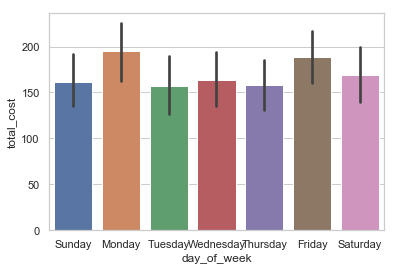

In [207]:
import seaborn as sns
import pandas as pd

order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]


sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day_of_week", y="total_cost", data=master, order=order)

